# AE4320 Assigment: Neural Networks
## Part 1: State & Parameter estimation with F-16 flight data
Author: José Cunha (5216087)

In [1]:
import numpy as np
from read_data import train_data, treat_data, validation_data
from kalman import KalmanFilter
from least_squares import LeastSquares, order_influence
np.random.seed(0)

In [2]:
# load training data
data = train_data()  

Apply Kalman Filter. For further details into the implementation, please check `kalman.py`

Observability matrix has full rank, hence system is observable and IEKF will converge.


100%|██████████| 10001/10001 [00:05<00:00, 1731.59it/s]


State estimation complete. The final value of C_alpha_up is:  0.3090876929520753


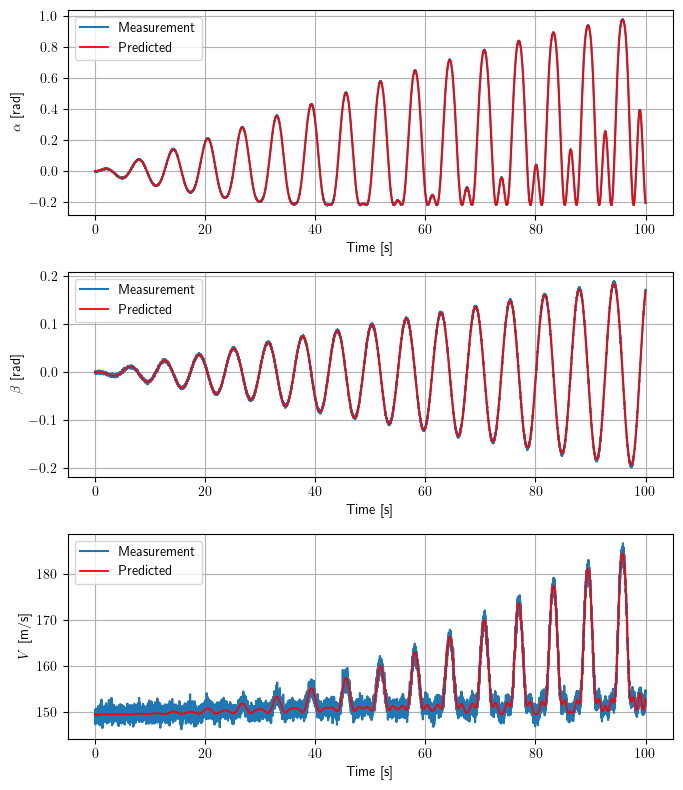

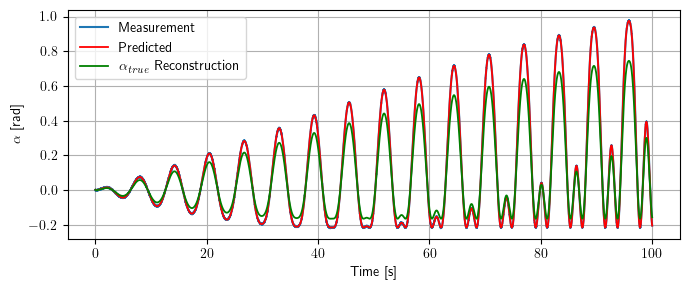

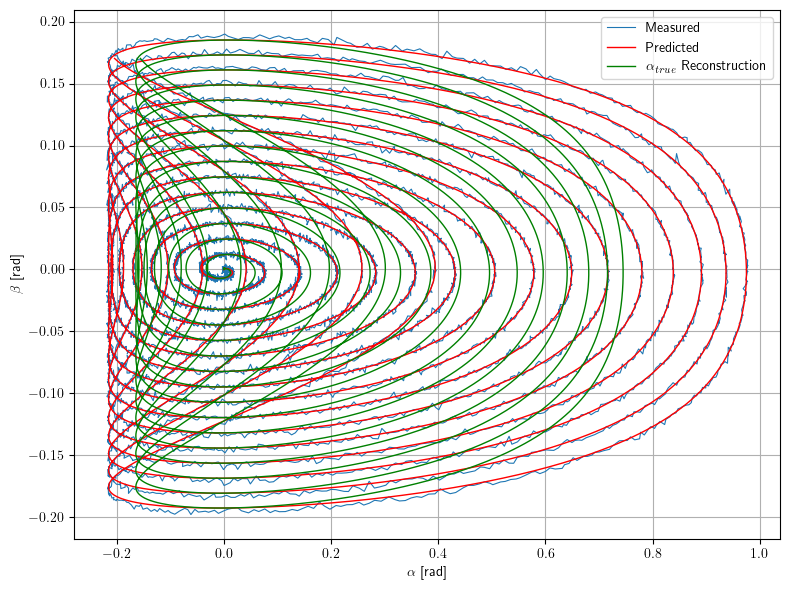

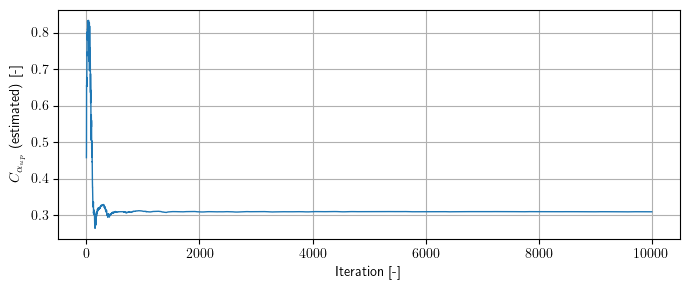

In [3]:
KF = KalmanFilter(dt=0.01, data=data, n_states=4)  # initialize object
KF.prove_convergence()  # check rank of observability matrix
KF.IEKF()  # perform Iterative Extended Kalman Filter
KF.plot()  # plot results

Apply Least Squares Estimation. For further details into the implementation, please check `least_squares.py`

First see the influence of the sensor glitch on the estimation

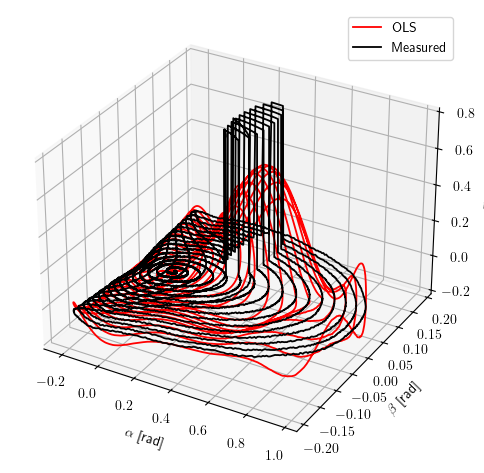

In [4]:
ols_data = np.loadtxt('data/output.csv', delimiter=',')  # load full reconstructed data
Y, X = ols_data[:, 0], ols_data[:, 1:]
order = 5

LS = LeastSquares(data=(Y, X), order=order, data_split=(0.7, 0.15, 0.15))  # initialize object
LS.OLS()
LS.plot_regression()

Remove glitched data and re-estimate the parameters

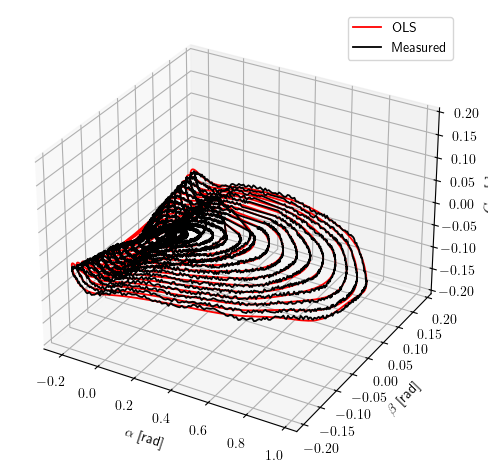

In [5]:
Ytreat, Xtreat = treat_data((Y, X))
LSt = LeastSquares(data=(Ytreat, Xtreat), order=order, data_split=(0.7, 0.15, 0.15))  # initialize object
LSt.OLS()
LSt.plot_regression(lims=(-0.2, 0.))

Show the influence of the polynomial model order on the accuracy of fit.

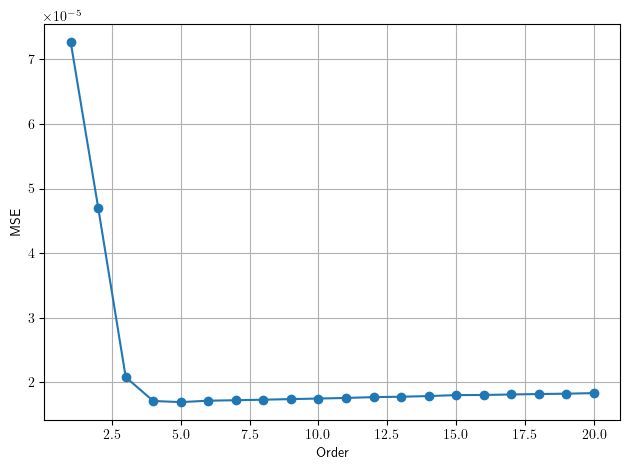

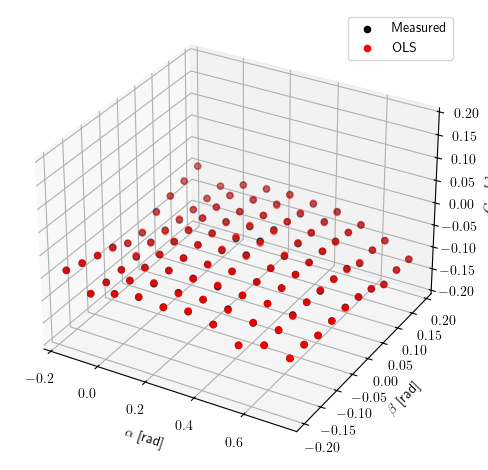

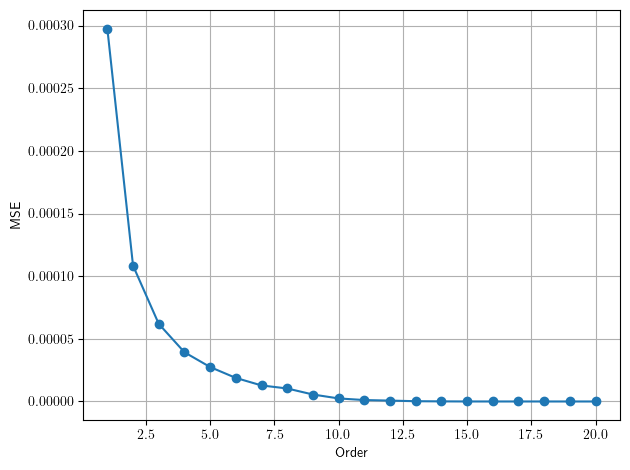

In [6]:
order_influence((Ytreat, Xtreat))

Yval, aval, bval = validation_data()
Xval = np.vstack((aval, bval)).T
ls = LeastSquares(data=(Yval, Xval), order=10, data_split=(0.7, 0, 0.3))
ls.OLS()
ls.plot_regression(lims=(-0.2, 0.), scatter=True)

order_influence((Yval, Xval.T))

In [ ]:
# 